In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy import linalg
from sklearn.utils import check_array
from sklearn.neighbors import kneighbors_graph, NearestNeighbors
from sklearn.cluster import KMeans


In [ ]:
mat = loadmat('drive/My Drive/thesis/jaffefull_with_label.mat')

In [ ]:
mat1=loadmat('drive/My Drive/thesis/dataset/100resize jaffe.mat')

In [ ]:
mat1

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 29 10:11:14 2019',
 '__version__': '1.0',
 'temp6': array([[[105, 112, 102, ..., 165, 151, 159],
         [113, 115, 106, ..., 167, 152, 166],
         [115, 114, 106, ..., 170, 153, 166],
         ...,
         [138, 133, 127, ..., 202, 187, 199],
         [137, 129, 125, ..., 202, 181, 201],
         [133, 126, 126, ..., 205, 188, 201]],
 
        [[106, 114, 104, ..., 171, 150, 162],
         [114, 113, 107, ..., 169, 150, 162],
         [115, 112, 108, ..., 171, 155, 164],
         ...,
         [134, 130, 125, ..., 201, 188, 201],
         [132, 131, 123, ..., 204, 186, 199],
         [134, 126, 125, ..., 208, 185, 201]],
 
        [[104, 114, 104, ..., 172, 153, 159],
         [108, 114, 109, ..., 174, 153, 162],
         [118, 117, 109, ..., 174, 155, 160],
         ...,
         [136, 130, 129, ..., 200, 195, 200],
         [134, 130, 127, ..., 203, 194, 197],
         [135, 130, 12

In [ ]:
mat

{'Label': array([[1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7,
         7, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7,
         7, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7,
         7, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 1,
         1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 1, 1,
         1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 1, 1, 1,
         2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 1, 1, 1, 2, 2,
         2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 1, 1, 1, 2, 2, 2,
         3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 1, 1, 1, 2, 2, 2, 3,
         3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Feb 20 15:01:08 2018',
 '__version__': '1.0',
 'out': array([[[105, 114,  96, ..., 166, 143, 157],
         [102, 115,  98, ..., 165, 155, 151],
         

In [ ]:
x_data=mat['out']
x_data.shape

(256, 256, 213)

In [ ]:
x_data1=mat1['temp6']

(-0.5, 99.5, 99.5, -0.5)

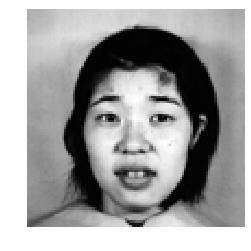

In [ ]:
plt.imshow(x_data1[:,:,50],cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

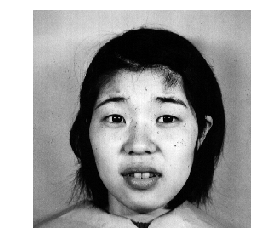

In [ ]:
plt.imshow(x_data[:,:,50],cmap='gray')
plt.axis('off')

In [ ]:
y_data=mat['Label']
y_data.shape

(1, 213)

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=100)
# x3_data=x_data.reshape(256*256,213)
# x3_data=x3_data.transpose()

# x_new = pca.fit_transform(x3_data)
# x_new.shape
# x_new5=x_new.reshape(213,10,10)
# plt.imshow(x_new5[1,:])
# x_new4=pca.inverse_transform(x_new)
# print(x_new4.shape)
# # x_new4=x_new4.reshape(213,256,256)
# print(x_new4.shape)
# plt.imshow(x_new4[1,:,:])

In [ ]:
def findEuclideanDistance(a, b):
    euclidean_distance = a - b
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance
x=np.zeros((213,213))

In [ ]:
for i in range(0,213):
    for j in range(0,213):
        x[i,j]=findEuclideanDistance(x_data1[:,:,i],x_data1[:,:,j]);

In [ ]:
x

array([[   0.        ,  858.55110506,  828.45579242, ..., 1023.46177261,
        1024.81656895, 1037.82512978],
       [ 858.55110506,    0.        ,  853.02344634, ..., 1013.54328965,
         997.24771246, 1016.6174305 ],
       [ 828.45579242,  853.02344634,    0.        , ...,  999.4283366 ,
        1013.52257005, 1015.09900995],
       ...,
       [1023.46177261, 1013.54328965,  999.4283366 , ...,    0.        ,
         915.31797754,  743.1399599 ],
       [1024.81656895,  997.24771246, 1013.52257005, ...,  915.31797754,
           0.        ,  784.63112352],
       [1037.82512978, 1016.6174305 , 1015.09900995, ...,  743.1399599 ,
         784.63112352,    0.        ]])

In [ ]:
k=0;
y_data=y_data.reshape(213*1)
x1=np.zeros((2,213,213))
for i in range(0,213):
    for j in range(0,213):
        if(y_data[i]==y_data[j]):
            x1[0,i,j]=findEuclideanDistance(x_data1[:,:,i],x_data1[:,:,j]);
            if(x1[0,i,j]!=0):# and x1[2,i,j]!=1):
                x1[1,i,j]=y_data[j]

In [ ]:
y_data=y_data.reshape(213,1) 
c=x1[0,:,:]
d=x1[1,:,:]  

In [ ]:
c1=np.zeros(8)
for j in range(1,8):
    for i in range(0,213):
        p=np.isin(d[i,:],j)
        x4=any(p)
        if(x4==True):
            c1[j]=c[i,:].max();

In [ ]:
c1

array([   0.        , 1034.73619827, 1010.89267482, 1039.22326764,
       1034.58155793, 1028.20280101, 1031.17942183, 1029.27790222])

In [ ]:
a=0;
s=np.zeros((213,213))
for i in range(0,213):
    for j in range(0,213):
        if(c[i,j]==0):
            continue
        z=int(d[i,j])
        f=c1[z]
        f1=(a+f)/2
        if(c[i,j]>0 and c[i,j]<=f1 ):
            s[i,j]=1-(2*(((c[i,j]-a)/(f-a))**2))
        if(c[i,j]>f1 and c[i,j]<=f):
            s[i,j]=2*(((c[i,j]-f)/(f-a))**2)

In [ ]:
D = np.diag(s.sum(1))
L = D - s
x_data1=x_data1.reshape(100*100,213)
x_data1=x_data1.transpose()



In [ ]:
print(x_data1.shape)
# plt.imshow(x_data[:,:,1])
# x_data=x_data.reshape(256*256,213)
# x_data=x_data.transpose()

(213, 10000)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
          #, svd_solver='full')
x_new = pca.fit_transform(x_data1)

In [ ]:
x_new.shape

(213, 132)

In [ ]:
# x_data2=x_data.reshape(213,256,256)
# plt.imshow(x_data2[1,:,:])

In [ ]:
n_components=132
def eigh_robust(a, b=None, eigvals=None, eigvals_only=False,
                overwrite_a=False, overwrite_b=False,
                turbo=True, check_finite=True):
    kwargs = dict(eigvals=eigvals, eigvals_only=eigvals_only,
                  turbo=turbo, check_finite=check_finite,
                  overwrite_a=overwrite_a, overwrite_b=overwrite_b)
    print(kwargs)
    # Check for easy case first:
    if b is None:
        return linalg.eigh(a, **kwargs)

    # Compute eigendecomposition of b
    kwargs_b = dict(turbo=turbo, check_finite=check_finite,
                    overwrite_a=overwrite_b)  # b is a for this operation
    S, U = linalg.eigh(b, **kwargs_b)

    # Combine a and b on left hand side via decomposition of b
    S[S <= 0] = np.inf
    Sinv = 1. / np.sqrt(S)
    W = Sinv[:, None] * np.dot(U.T, np.dot(a, U)) * Sinv
    output = linalg.eigh(W, **kwargs)

    if eigvals_only:
        return output
    else:
        evals, evecs = output
        return evals, np.dot(U, Sinv[:, None] * evecs)
evals, evecs = eigh_robust(np.dot(x_new.T, np.dot(L, x_new)),
                                   np.dot(x_new.transpose(), np.dot(D, x_new)),
                                   eigvals=(0, n_components - 1))
print(evals)

{'eigvals': (0, 131), 'eigvals_only': False, 'turbo': True, 'check_finite': True, 'overwrite_a': False, 'overwrite_b': False}
[0.01354912 0.01805361 0.0293417  0.04359935 0.05801703 0.08313009
 0.09989951 0.11831241 0.13053954 0.14479704 0.14873856 0.17606246
 0.19528092 0.2017872  0.2136721  0.22083764 0.23833214 0.24959759
 0.25507078 0.25719168 0.26887537 0.28062846 0.29376572 0.29959729
 0.31100466 0.31748334 0.32560531 0.34349607 0.36023039 0.36309319
 0.38187439 0.39053004 0.39498053 0.4041804  0.40931804 0.41661424
 0.42018385 0.42226098 0.42727279 0.44101117 0.44665756 0.45914194
 0.47586632 0.48433093 0.51216622 0.521433   0.5352679  0.53998884
 0.55113037 0.55818523 0.5703787  0.57509171 0.58607875 0.59449091
 0.6004503  0.60799352 0.61713458 0.65260717 0.67180407 0.68510012
 0.69442488 0.7025106  0.73465659 0.77224734 0.80286021 0.83797267
 0.87138839 0.93644819 0.99340176 1.04769727 1.05206897 1.09843542
 1.10395854 1.11121125 1.11715972 1.12463041 1.12731139 1.1442436
 1.1

In [ ]:
c=np.linalg.pinv(evecs.transpose())
c.shape

(132, 132)

In [ ]:
x_new.shape

(213, 132)

In [ ]:
x_new1=np.dot(evecs.transpose(),x_new.transpose());
print(x_new.shape)
print(evecs.transpose().shape)
x_new1=x_new1.transpose();
print(x_new1.shape)


(213, 132)
(132, 132)
(213, 132)


In [ ]:
x_new1.shape

(213, 132)

In [ ]:
x_new2=x_new1
print(x_new2.shape)
x_new3=np.dot(x_new2,c.transpose())
print(x_new3.shape)
x_new4=pca.inverse_transform(x_new3)
print(x_new4.shape)


(213, 132)
(213, 132)
(213, 10000)


(-0.5, 99.5, 99.5, -0.5)

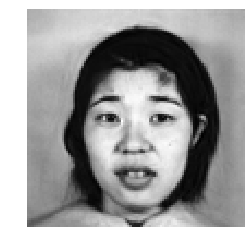

In [ ]:
x_new5=x_new4.reshape(213,100,100)
plt.imshow(x_new5[50,:,:],cmap='gray')
plt.axis('off')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new1, y_data, test_size = 0.2, random_state = None)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))#ac

1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
